# Kirtika Das(Data Science and Business Analytics Intern)

# Task 1- Prediction using Supervised ML 

## Simple Linear Regression Model
### Objective: To predict the percentage of marks that a student is expected to score based on the number of study hours.

### I. Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### II. Importing the Dataset


In [20]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print ("Data Imported Successfully")
dataset.head(25)

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [21]:
# Basic statistics: 

dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### III. Visualising the Input Data

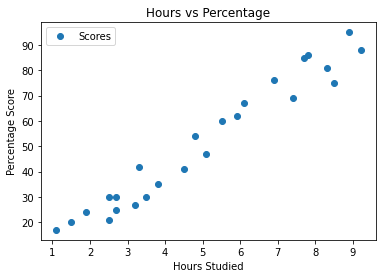

In [17]:
# This dataset consists of only two variables. Now,plotting the datapoints on a 2-D graph:

dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### The above graph shows a linear positive relation between the number of hours studied and the percentage of marks secured.

In [22]:
# Correlation between the two variables:

dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### IV. Preparaing the Data 

In [23]:
# Dividing the dataset into "attributes" (inputs) and "labels" (outputs):

X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  

In [28]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [30]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [24]:
# Splitting this data into Training sets and Test sets:

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### V. Training the Simple linear regression model on the Training Set

In [37]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


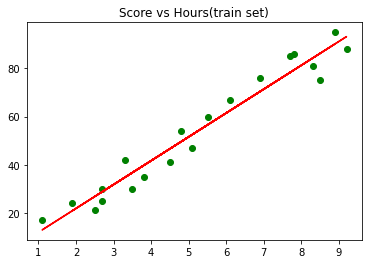

In [39]:
# Fitting the regression line:
line = regressor.coef_*X+regressor.intercept_

# Visualising the Training set Results:
plt.scatter(X_train, y_train, color ='green')
plt.plot(X_train, regressor.predict(X_train), color = 'red' )
plt.title('Score vs Hours(train set)')
plt.show()

#### This depicts a positively sloped linear regression line.

### VI. Predicting the Test Set Results

In [34]:
# Testing the data in Hours:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [35]:
# Predicting the Scores:
y_pred = regressor.predict(X_test)

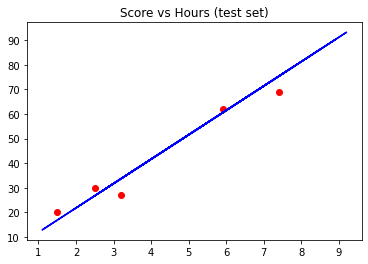

In [41]:
# Visualising the Test Set Result:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train,regressor.predict(X_train), color = 'blue')
plt.title('Score vs Hours (test set)')
plt.show()

### VII. Comparing the Actual vs Predicted

In [42]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


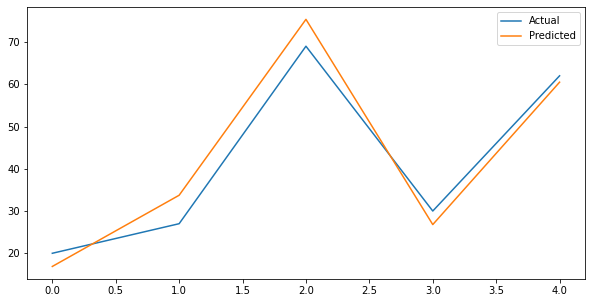

In [44]:
# visualising the result
df.plot(kind='line', figsize= (10,5))

### VIII. Accuracy of the fitted model:


In [53]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


In [54]:
from sklearn import metrics
r_2 = metrics.r2_score(y_test,y_pred)
print("R Squared value:", r_2)

R Squared value: 0.9454906892105356


#### The model is well fitted and the predictions will be accurate.

### IX. Predicting Score if a student studies for 9.25 Hours

In [56]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)

own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


#### The score is predicted to be 93.69, if a student studies for 9.25 hrs.